In [435]:
import numpy as np
import matplotlib.pyplot as plt

## Define the risk occurrence methods
* Triangular Distribution - Here the Probability of occurrence per year is the mode and the left and the right.
* Normal Distribution - The cyber threats is assumed to be in the range of 90% confidence level for the normal distribution that is why the formula can be used to calculate mean and std (Santini, P et.al, 2019)
$$
\mu = \frac{log(max\_value)+ log(min\_value)}{2} $$
$$\sigma =\frac{log(max\_value)- log(min\_value)}{3.29}
$$
* Poisson Distribution - The mean of the occurrence of the threat is used to calculate the values

In [436]:
def calculate_if_risk_occurs_triangular(attack_probability):
    probability = np.random.triangular(0, attack_probability, 1)
    return probability <= attack_probability

In [437]:
def calculate_if_risk_occurs_normal(lower, upper):
    mean = (np.log(lower) + np.log(upper)) / 2.0
    std_dv = (np.log(upper) - np.log(lower)) / 3.29

    return np.random.lognormal(mean, std_dv) <= mean

In [438]:
def calculate_if_risk_occurs_poisson(mean):
    return np.random.poisson(mean) <= mean

In [439]:
def get_loss_amount(lower, upper):
    mean = (np.log(lower) + np.log(upper)) / 2.0
    std_dv = (np.log(upper) - np.log(lower)) / 3.29
    return np.random.lognormal(mean, std_dv)

## Simulate total loss
This step simulates the probability of the cyber threat to occur and the probability of the loss after the threat happens. The threat is modeled using different probability distribution curves, however the cost of loss is modeled using log normal. (Santini, P et.al, 2019)

In [440]:
def simulate_risk_portfolio(risk):
    total_loss_amount = 0
    if risk["distribution"] == "triangular":
        if calculate_if_risk_occurs_triangular(risk["probability"]):
            total_loss_amount = get_loss_amount(risk["lower"], risk["upper"])
    elif risk["distribution"] == "normal":
        if calculate_if_risk_occurs_normal(risk["lower_occ"], risk["upper_occ"]):
            total_loss_amount = get_loss_amount(risk["lower"], risk["upper"])
    elif risk["distribution"] == "poisson":
        if calculate_if_risk_occurs_poisson(risk["mean"]):
            total_loss_amount = get_loss_amount(risk["lower"], risk["upper"])
    return total_loss_amount

In [441]:
def monte_carlo_simulation(cyber_risks, iterations):
    yearly_losses = []
    for i in range(iterations):
        loss_amount = simulate_risk_portfolio(cyber_risks)
        yearly_losses.append(loss_amount)
    return yearly_losses

### Method to plot exceedance curve
Two methods are created to plot the different loss exceedance probability curves.
```
calculate_loss_exceedance_prob()
calculate_loss_exceedance_prob_mitigated()
```


In [442]:
def calculate_loss_exceedance_prob(losses, risk, labels):
    losses_np = np.array(losses)
    sorted_losses = np.sort(losses_np[losses_np != 0])
    num_losses = len(sorted_losses)
    exceedance_probs = [((num_losses - i) / (num_losses + 1)*100 )for i in range(num_losses)]

    # Plot the loss exceedance curve
    plt.plot(sorted_losses, exceedance_probs)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel(f'Loss for cyber risks in pounds')
    plt.ylabel('Exceedance Probability in %')
    plt.yticks(np.arange(0, 105, 5))
    plt.legend(labels=labels)
    plt.xlim(0, 400000)
    plt.title('Loss Exceedance Curve before mitigation')
    plt.grid(True)

In [443]:
def calculate_loss_exceedance_prob_mitigated(losses, risk, labels):
    losses_np = np.array(losses)
    sorted_losses = np.sort(losses_np[losses_np != 0])
    num_losses = len(sorted_losses)
    exceedance_probs = [((num_losses - i) / (num_losses + 1)*100 )for i in range(num_losses)]

    # Plot the loss exceedance curve
    plt.plot(sorted_losses, exceedance_probs)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel(f'Loss for cyber risks in pounds')
    plt.ylabel('Exceedance Probability in %')
    plt.yticks(np.arange(0, 105, 5))
    plt.legend(labels=labels)
    plt.xlim(0, 300000)
    plt.title('Loss Exceedance Curve after mitigation')
    plt.grid(True)

In [444]:
# The method print the histogram for the loss vs the simulation number
def print_simulation_to_loss(losses, risk):
    no_of_simulations = np.arange(len(losses))
    plt.figure(figsize=(10, 10))

    plt.title(f'Monte-Carlo Simulation {risk}')
    plt.xlabel(f'Loss for {risk} in pounds')
    plt.ylabel(f'Simulation number')
    plt.plot(no_of_simulations, losses)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

In [445]:
risks = [{
    "name": "DDoS",
    "probability": 0.2,
    "lower": 10000,
    "upper": 227308,
    "xlim": 247308,
    "xticks": 30000,
    "distribution": "triangular"
},
{
    "name": "DoS",
    "upper_occ": 130,
    "lower_occ": 0.5,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Configuration error",
    "probability": 0.5,
    "lower": 1000,
    "upper": 10000,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "triangular"

},
{
    "name": "Malware",
    "upper_occ": 79.14,
    "lower_occ": 1,
    "lower": 10000,
    "upper": 57000,
    "xlim": 57000,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Ransomware",
    "upper_occ": 80,
    "lower_occ": 5,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Insider threat",
    "upper_occ": 40,
    "lower_occ": 2,
    "lower": 10000,
    "upper": 124000,
    "xlim": 124000,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Phishing Attack",
    "upper_occ": 300,
    "lower_occ": 11,
    "lower": 10000,
    "upper": 224300,
    "xlim": 224300,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Spam",
    "mean": 50,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
},
{
    "name": "Unauthorized access",
    "mean": 700,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
},
{
    "name": "Social engineering",
    "mean": 203,
    "lower": 500,
    "upper": 85434,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
}
]

In [446]:
risks_mitigated = [{
    "name": "DDoS mitigated",
    "probability": 0.1,
    "lower": 10000,
    "upper": 227308,
    "xlim": 247308,
    "xticks": 30000,
    "distribution": "triangular"
},
{
    "name": "DoS mitigated",
    "upper_occ": 20,
    "lower_occ": 0.5,
    "lower": 1000,
    "upper": 10000,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Configuration error mitigated",
    "probability": 0.02,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "triangular"

},
{
    "name": "Malware mitigated",
    "upper_occ": 29.14,
    "lower_occ": 1,
    "lower": 10000,
    "upper": 57000,
    "xlim": 57000,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Insider threat mitigated",
    "upper_occ": 10,
    "lower_occ": 2,
    "lower": 10000,
    "upper": 124000,
    "xlim": 124000,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Phishing Attack mitigated",
    "upper_occ": 200,
    "lower_occ": 11,
    "lower": 10000,
    "upper": 224300,
    "xlim": 224300,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Spam mitigated",
    "mean": 3,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
},
{
    "name": "Unauthorized access mitigated",
    "mean": 1,
    "lower": 500,
    "upper": 22430,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
},
{
    "name": "Ransomware mitigated",
    "upper_occ": 30,
    "lower_occ": 5,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"

},
{
    "name": "Social engineering mitigated",
    "mean": 40,
    "lower": 500,
    "upper": 85434,
    "xlim": 22430,
    "xticks": 5000,
    "distribution": "poisson"
}
]

In [447]:
def aggregate_loss_curves(loss_curves):
    max_loss_points = []
    for curve in loss_curves:
        max_loss_points.append(curve.max())

    sorted_max_loss_points = np.sort(max_loss_points)
    exceedance_probs = np.linspace(1, 0, len(sorted_max_loss_points))
    return sorted_max_loss_points, exceedance_probs

In [448]:
def simulate_risks_before_mitigation(risks, iterations, labels):
    total_costs = np.zeros(iterations)
    for risk in risks:
        yearly_losses = monte_carlo_simulation(risk, iterations=iterations)
        labels.append(risk["name"])
        print(f' Avg loss for {risk["name"]} costs {sum(yearly_losses) / iterations}')
        calculate_loss_exceedance_prob(yearly_losses, risk, labels)
        yearly_losses_np = np.array(yearly_losses)
        total_costs = np.add(total_costs, yearly_losses_np)
    labels.append("Total")
    print(f' Avg loss for total costs {sum(total_costs) / iterations}')
    return total_costs

In [449]:
def simulate_risks_after_mitigation(risks_mitigated, iterations, labels):
    total_costs_mitigated = np.zeros(iterations)
    for risk in risks_mitigated:
        yearly_losses = monte_carlo_simulation(risk, iterations=iterations)
        labels.append(risk["name"])
        print(f' Avg loss for {risk["name"]} costs {sum(yearly_losses) / iterations}')
        calculate_loss_exceedance_prob_mitigated(yearly_losses, risk, labels)
        yearly_losses_np = np.array(yearly_losses)
        total_costs_mitigated = np.add(total_costs_mitigated, yearly_losses_np)
    labels.append("Total after mitigation")
    print(f' Avg loss for total costs after mitigation {sum(total_costs_mitigated) / iterations}')
    return  total_costs_mitigated

In [450]:
ITERATIONS = 10000

 Avg loss for DDoS costs 15525.139748313311
 Avg loss for DoS costs 7978.347577278579
 Avg loss for Configuration error costs 2018.4499527066282
 Avg loss for Malware costs 4121.330796441513
 Avg loss for Ransomware costs 322.477406437232
 Avg loss for Insider threat costs 2705.359467962644
 Avg loss for Phishing Attack costs 315.06317610129577
 Avg loss for Spam costs 3490.5270891991786
 Avg loss for Unauthorized access costs 3404.4378426857925
 Avg loss for Social engineering costs 11097.127540731395
 Avg loss for total costs 50978.26059785755


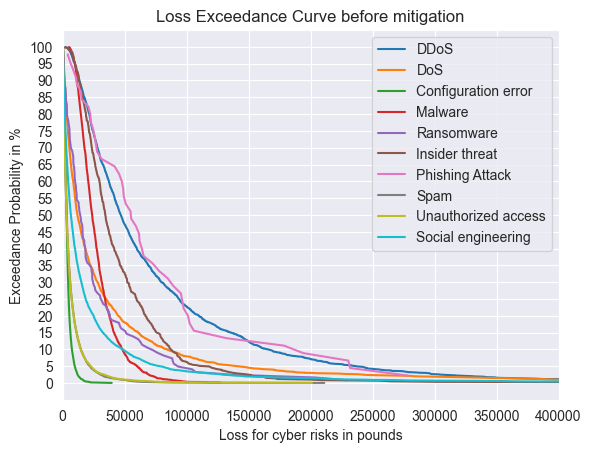

In [451]:
# Plot Loss Exceedance Curve for all the threats before and after mitigation
labels = []
total_costs = simulate_risks_before_mitigation(risks, ITERATIONS ,labels)
plt.show()

 Avg loss for DDoS mitigated costs 6580.021778404974
 Avg loss for DoS mitigated costs 767.3231197445268
 Avg loss for Configuration error mitigated costs 846.0539891154571
 Avg loss for Malware mitigated costs 3510.9084131430013
 Avg loss for Insider threat mitigated costs 770.6046539245318
 Avg loss for Phishing Attack mitigated costs 203.80013217463465
 Avg loss for Spam mitigated costs 4132.414083031816
 Avg loss for Unauthorized access mitigated costs 4752.83808590453
 Avg loss for Ransomware mitigated costs 44.36585252304027
 Avg loss for Social engineering mitigated costs 11822.664326506174
 Avg loss for total costs after mitigation 33430.994434472756


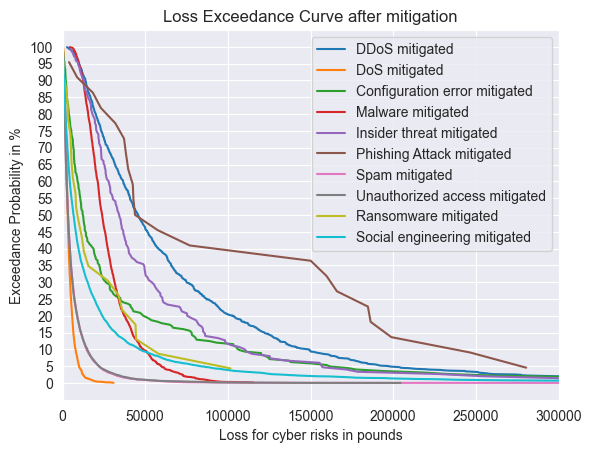

In [452]:
labels_new = []
total_costs_mitigated = simulate_risks_after_mitigation(risks_mitigated, ITERATIONS ,labels_new)
plt.show()

## Calculate loss exceedance for total risk
In this step the loss exceedance curve is plotted Total loss before mitigation and total loss after mitigation. With this graph one can compare the probability of total loss before after mitigation costs.

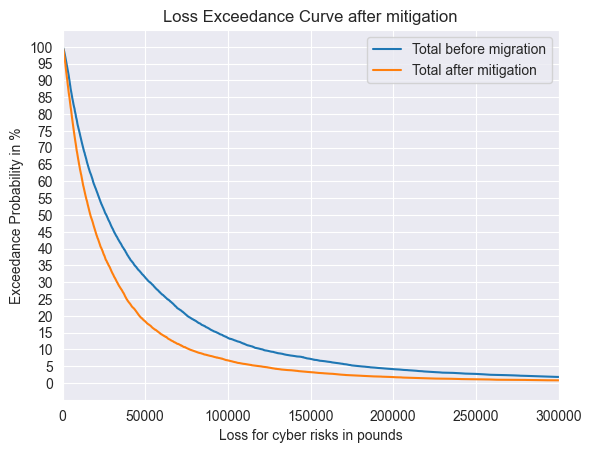

In [453]:
calculate_loss_exceedance_prob(total_costs, _, [])
calculate_loss_exceedance_prob_mitigated(total_costs_mitigated,_, ["Total before migration", "Total after mitigation"])
plt.show()

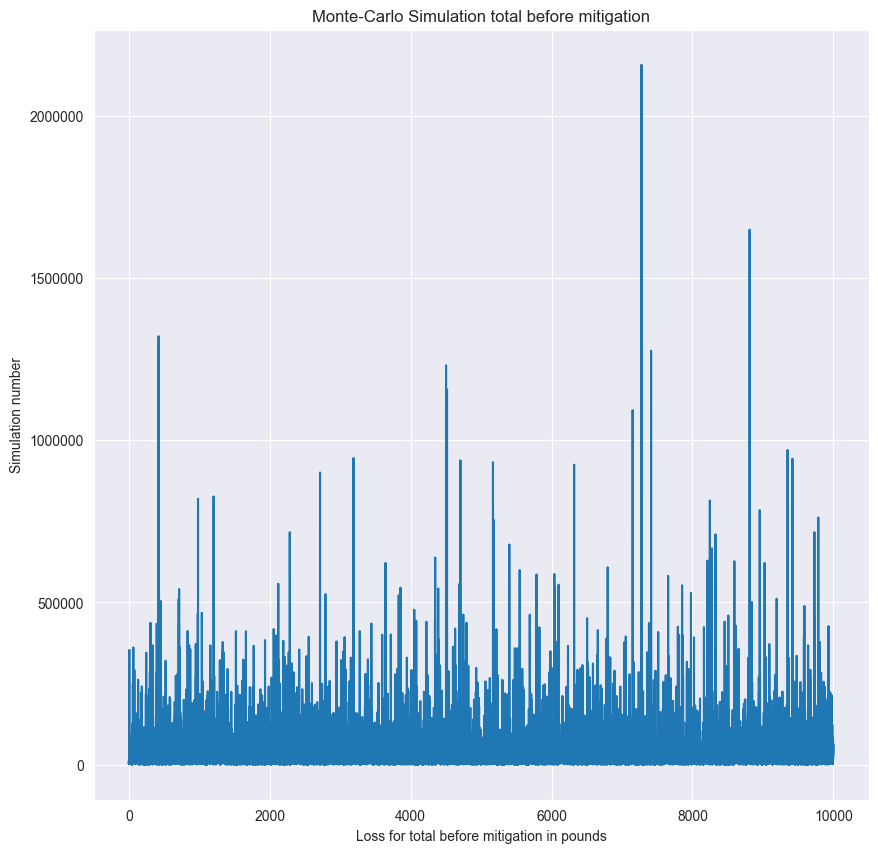

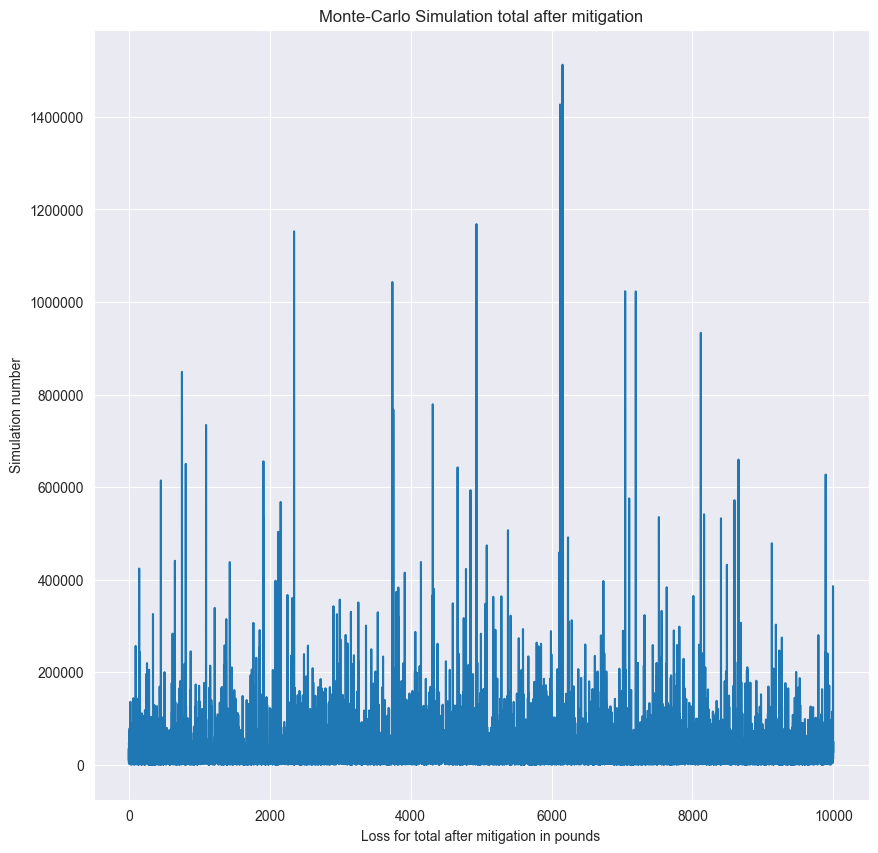

In [454]:
print_simulation_to_loss(total_costs, "total before mitigation")
plt.show()
print_simulation_to_loss(total_costs_mitigated, "total after mitigation")
plt.show()

## References
Santini, P., Gottardi, G., Baldi, M. and Chiaraluce, F., 2019. A data-driven approach to cyber risk assessment. Security and Communication Networks, 2019.